In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [47]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [48]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [49]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [50]:
# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key

In [51]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f44f598292fd761188a9cd0103f3c0c


In [52]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [53]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | bonnyville
Processing Record 4 of Set 1 | elk plain
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | launceston
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | jalingo
Processing Record 13 of Set 1 | chivolo
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | khandbari
Processing Record 18 of Set 1 | loandjili
Processing Record 19 of Set 1 | boljarovo
City not found. Skipping...
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | aanekoski
Processing Record 22 of S

Processing Record 34 of Set 4 | guerrero negro
Processing Record 35 of Set 4 | sorland
Processing Record 36 of Set 4 | rocha
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | chichli
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | sulangan
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | tocopilla
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | suntar
Processing Record 46 of Set 4 | coahuayana
Processing Record 47 of Set 4 | sinnamary
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | machiques
Processing Record 1 of Set 5 | blytheville
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | ishigaki
Processing Record 4 of Set 5 | watsa
Processing Record 5 of Set 5 | cidreira
Processing Recor

Processing Record 21 of Set 8 | ziarat
Processing Record 22 of Set 8 | shenjiamen
Processing Record 23 of Set 8 | namwala
Processing Record 24 of Set 8 | whitianga
Processing Record 25 of Set 8 | port hedland
Processing Record 26 of Set 8 | hannibal
Processing Record 27 of Set 8 | oistins
Processing Record 28 of Set 8 | koumac
Processing Record 29 of Set 8 | marchena
Processing Record 30 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | ponta delgada
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | erzin
Processing Record 36 of Set 8 | benghazi
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | pemangkat
City not found. Skipping...
Processing Record 40 of Set 8 | yumen
Processing Record 41 of Set 8 | tahara
Processing Record 42 of Set 8 | lubao
Processing Re

Processing Record 4 of Set 12 | ca mau
Processing Record 5 of Set 12 | omboue
Processing Record 6 of Set 12 | skelleftea
Processing Record 7 of Set 12 | karwar
Processing Record 8 of Set 12 | guozhen
Processing Record 9 of Set 12 | tautira
Processing Record 10 of Set 12 | moyale
Processing Record 11 of Set 12 | siedlce
Processing Record 12 of Set 12 | san pedro de ycuamandiyu
Processing Record 13 of Set 12 | warkworth
Processing Record 14 of Set 12 | san cristobal
Processing Record 15 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Record 16 of Set 12 | sorong
Processing Record 17 of Set 12 | danville
Processing Record 18 of Set 12 | isiro
Processing Record 19 of Set 12 | canberra
Processing Record 20 of Set 12 | severo-kurilsk
Processing Record 21 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 22 of Set 12 | buchanan
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | awbari
Processing Record 25 of Set 12 

In [54]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,15.34,74.49,75.20,69,75,11.41,IN,2020-01-06 07:06:29
1,Port Blair,11.67,92.75,81.72,76,0,15.21,IN,2020-01-06 07:01:45
2,Bonnyville,54.27,-110.74,14.00,78,75,3.36,CA,2020-01-06 07:06:29
3,Elk Plain,47.04,-122.37,44.01,93,90,10.29,US,2020-01-06 07:06:30
4,Busselton,-33.64,115.35,93.00,7,32,11.65,AU,2020-01-06 07:02:05
5,Albany,42.65,-73.75,28.99,73,90,2.77,US,2020-01-06 07:06:30
6,Launceston,-41.43,147.14,73.40,38,0,19.46,AU,2020-01-06 07:02:10
7,Mataura,-46.19,168.86,48.99,91,100,23.00,NZ,2020-01-06 07:06:31
8,Ushuaia,-54.81,-68.31,44.60,65,40,19.46,AR,2020-01-06 07:04:12
9,Khatanga,71.98,102.47,3.47,96,98,7.20,RU,2020-01-06 07:06:32


In [55]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,IN,2020-01-06 07:06:29,15.34,74.49,75.20,69,75,11.41
1,Port Blair,IN,2020-01-06 07:01:45,11.67,92.75,81.72,76,0,15.21
2,Bonnyville,CA,2020-01-06 07:06:29,54.27,-110.74,14.00,78,75,3.36
3,Elk Plain,US,2020-01-06 07:06:30,47.04,-122.37,44.01,93,90,10.29
4,Busselton,AU,2020-01-06 07:02:05,-33.64,115.35,93.00,7,32,11.65
5,Albany,US,2020-01-06 07:06:30,42.65,-73.75,28.99,73,90,2.77
6,Launceston,AU,2020-01-06 07:02:10,-41.43,147.14,73.40,38,0,19.46
7,Mataura,NZ,2020-01-06 07:06:31,-46.19,168.86,48.99,91,100,23.00
8,Ushuaia,AR,2020-01-06 07:04:12,-54.81,-68.31,44.60,65,40,19.46
9,Khatanga,RU,2020-01-06 07:06:32,71.98,102.47,3.47,96,98,7.20


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578294617.535436

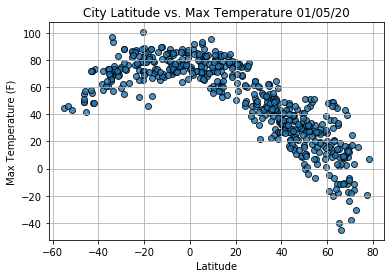

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

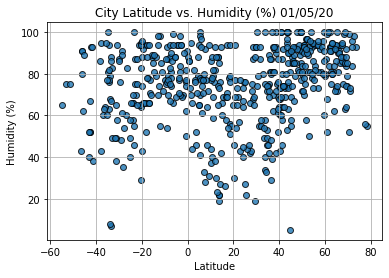

In [60]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

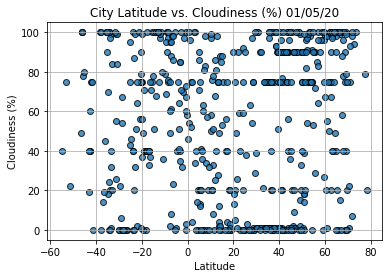

In [61]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

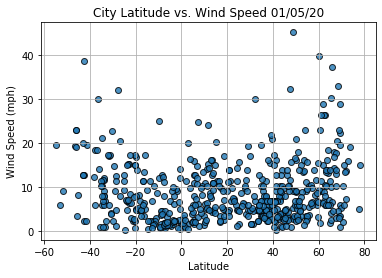

In [62]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [75]:
# Import linregress.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
# Get information at index 13 of city data.
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2020-01-06 07:06:33
Lat                         72.79
Lng                        -56.15
Max Temp                   -30.66
Humidity                       98
Cloudiness                     94
Wind Speed                  16.02
Name: 13, dtype: object

In [70]:
# Return a dataframe with all Northern Hemisphere data.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,IN,2020-01-06 07:06:29,15.34,74.49,75.20,69,75,11.41
1,Port Blair,IN,2020-01-06 07:01:45,11.67,92.75,81.72,76,0,15.21
2,Bonnyville,CA,2020-01-06 07:06:29,54.27,-110.74,14.00,78,75,3.36
3,Elk Plain,US,2020-01-06 07:06:30,47.04,-122.37,44.01,93,90,10.29
5,Albany,US,2020-01-06 07:06:30,42.65,-73.75,28.99,73,90,2.77


In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

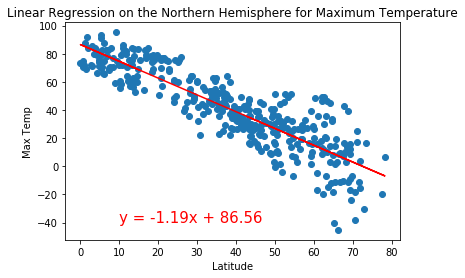

In [77]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,-40))

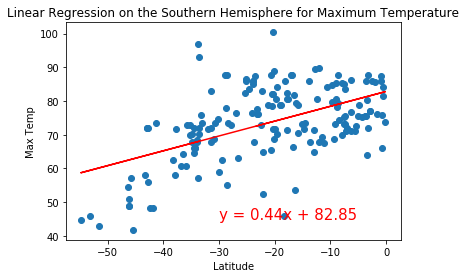

In [82]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-30,45))

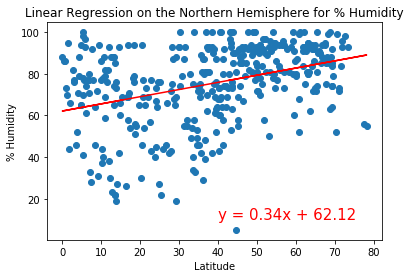

In [84]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

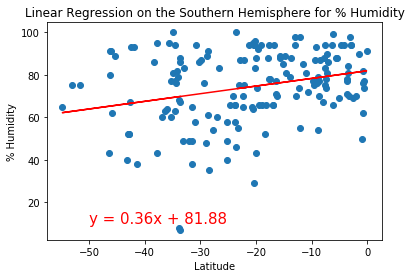

In [86]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,10))

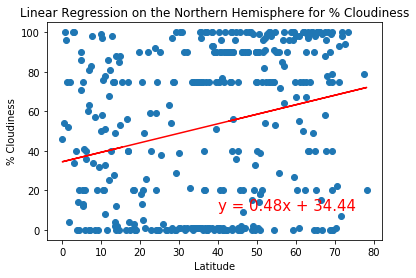

In [87]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

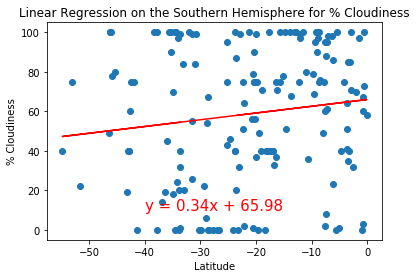

In [89]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-40,10))

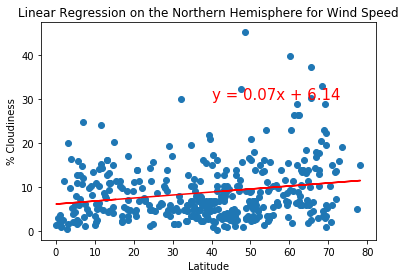

In [91]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       '% Cloudiness',(40,30))

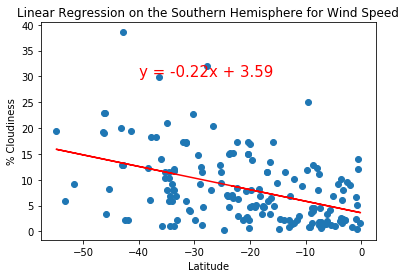

In [93]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       '% Cloudiness',(-40,30))